In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import statsmodels.api as sm
import pandas_datareader.data as web
import datetime

import factors_util as fac_util

In [9]:
spy_data = fac_util.download_from_yf("SPY", "2015-01-01", "2025-01-01")

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

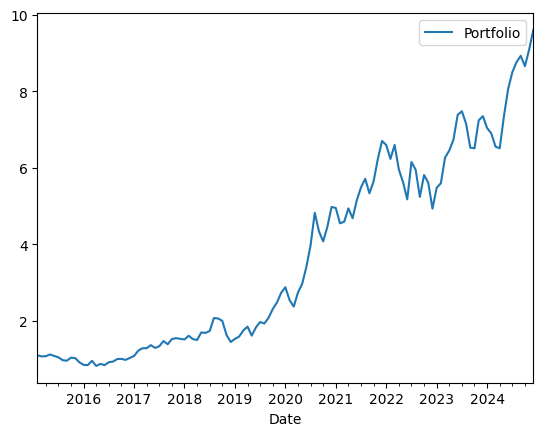

In [48]:
aapl_data = fac_util.download_from_yf("AAPL", "2015-01-01", "2025-01-01")
aapl_data.head()
(1+aapl_data).cumprod().plot.line()

[*********************100%***********************]  1 of 1 completed

(119, 1)


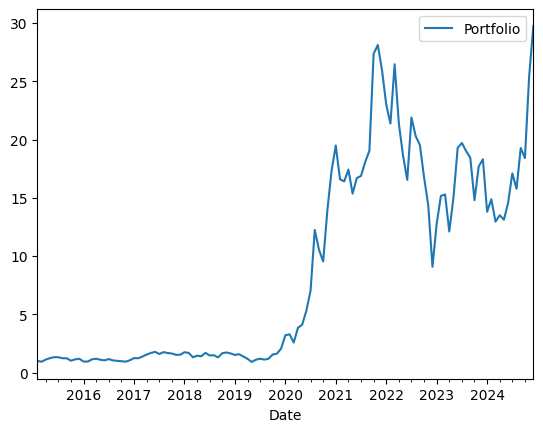

In [75]:
tsla_data = fac_util.download_from_yf("TSLA", "2015-01-01", "2025-01-01")
tsla_data.head()
(1+tsla_data).cumprod().plot.line()
print(tsla_data.shape)

[*********************100%***********************]  1 of 1 completed

(119, 1)


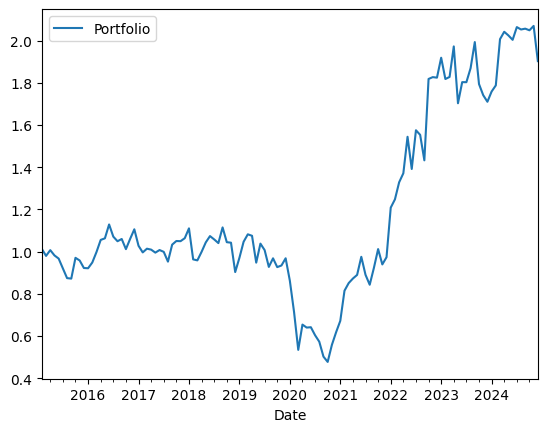

In [86]:
xom_data = fac_util.download_from_yf("XOM", "2015-01-01", "2025-01-01")
xom_data.head()
(1+xom_data).cumprod().plot.line()
print(xom_data.shape)

[*********************100%***********************]  1 of 1 completed

(119, 1)


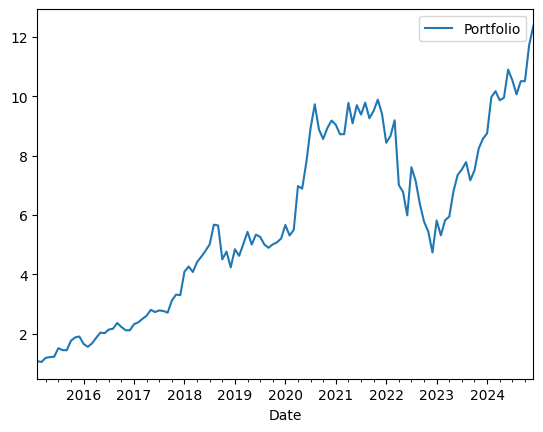

In [99]:
amzn_data = fac_util.download_from_yf("AMZN", "2015-01-01", "2025-01-01")
amzn_data.head()
(1+amzn_data).cumprod().plot.line()
print(amzn_data.shape)

[*********************100%***********************]  1 of 1 completed

(119, 1)


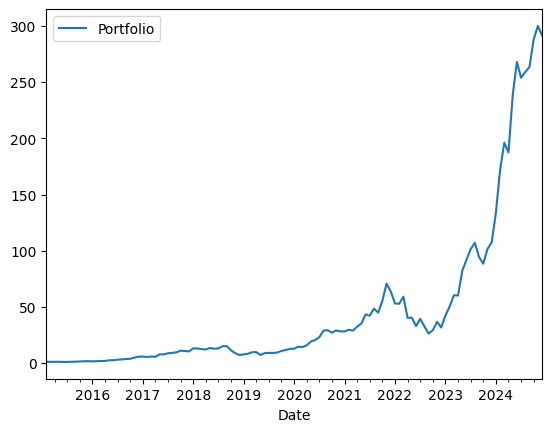

In [103]:
nvda_data = fac_util.download_from_yf("NVDA", "2015-01-01", "2025-01-01")
nvda_data.head()
(1+nvda_data).cumprod().plot.line()
print(nvda_data.shape)

In [37]:
factors_data = fac_util.load_ff_factors("F-F_Research_Data_5_Factors_2x3.CSV")

In [28]:
factors_data = fac_util.load_ff_factors("F-F_Research_Data_Factors.CSV")

In [33]:
spy_data.head()

,Portfolio
Date,
2015-02,0.056204
2015-03,-0.020079
2015-04,0.014341
2015-05,0.012856
2015-06,-0.025054


In [38]:
factors_data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
1963-07,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027
1963-08,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025
1963-09,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027
1963-10,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029
1963-11,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027


In [104]:
anal_data = nvda_data

                            OLS Regression Results                            
Dep. Variable:       Excess_Portfolio   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     10.33
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           9.19e-08
Time:                        17:31:18   Log-Likelihood:                 77.865
No. Observations:                  91   AIC:                            -143.7
Df Residuals:                      85   BIC:                            -128.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0326      0.012      2.809      0.0

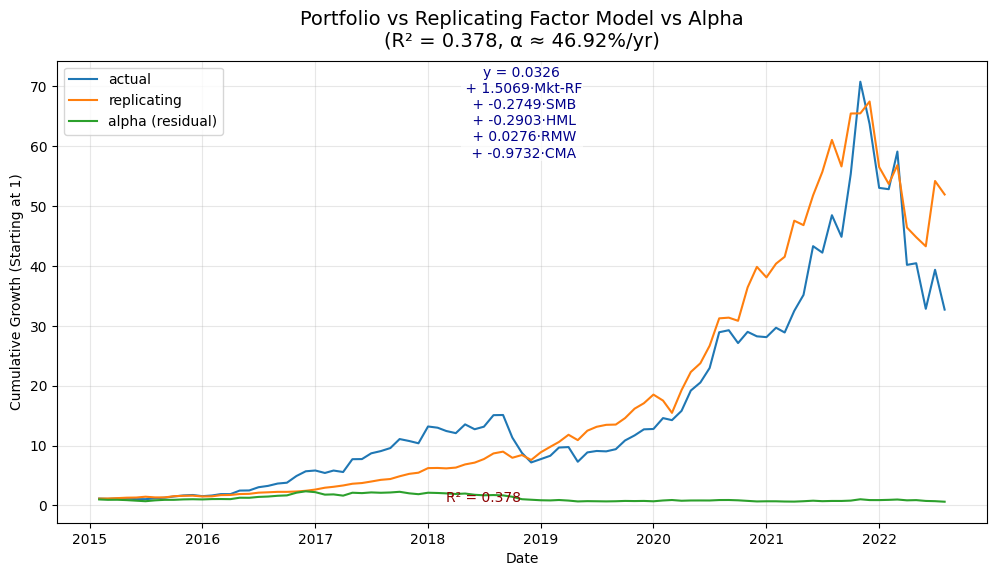

In [105]:
model, data, cumulative = fac_util.factor_model_statsmodel(
    anal_data,
    factors_data
)
print(model.summary())
print(cumulative.head())
fac_util.plot_model_statsmodel(cumulative, model=model)

## Using Lasso in scikit-learn

0.36500835516030494
y = 0.0351
 +1.2723·Mkt-RF
 -0.8608·CMA
 -0.1467·HML
           actual  replicating  alpha (residual)
2015-02  1.148958     1.131233          1.017725
2015-03  1.094302     1.160404          0.943068
2015-04  1.160702     1.213244          0.957348
2015-05  1.157042     1.286375          0.896623
2015-06  1.056295     1.325365          0.791375


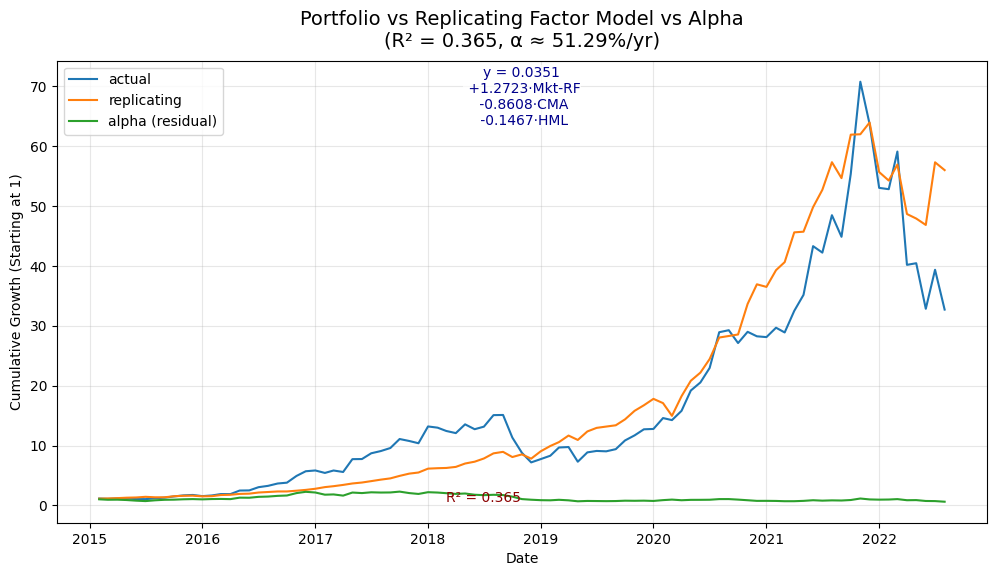

In [106]:
lasso, coefs, intercept, rsq, data, cumulative = fac_util.factor_model_lasso(
    anal_data,
    factors_data
)
print(rsq)
print(fac_util.get_formula_lasso(intercept, coefs))
print(cumulative.head())
fac_util.plot_model_lasso(cumulative, intercept, coefs, rsq)

<Axes: >

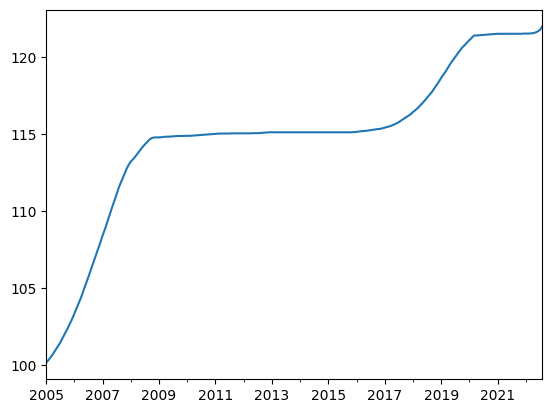

In [113]:
(100*(1+factors_data.loc["2005":]["RF"]).cumprod()).plot.line()

In [114]:
rf_monthly = factors_data["RF"]
rf_annual = (1 + rf_monthly).groupby(rf_monthly.index.year).prod() - 1
rf_annual

1963    0.016512
1964    0.035257
1965    0.039186
1966    0.047503
1967    0.041986
1968    0.052209
1969    0.065697
1970    0.065167
1971    0.043856
1972    0.038357
1973    0.069303
1974    0.080093
1975    0.057984
1976    0.050847
1977    0.051265
1978    0.071965
1979    0.103833
1980    0.112587
1981    0.147175
1982    0.105345
1983    0.087957
1984    0.098371
1985    0.077203
1986    0.061570
1987    0.054724
1988    0.063575
1989    0.083750
1990    0.078381
1991    0.055986
1992    0.035050
1993    0.028978
1994    0.038977
1995    0.055986
1996    0.051999
1997    0.052523
1998    0.048547
1999    0.046877
2000    0.058828
2001    0.038248
2002    0.016321
2003    0.010248
2004    0.011863
2005    0.029798
2006    0.048130
2007    0.046668
2008    0.015913
2009    0.000900
2010    0.001000
2011    0.000400
2012    0.000600
2013    0.000000
2014    0.000000
2015    0.000100
2016    0.002102
2017    0.007928
2018    0.018149
2019    0.021509
2020    0.004608
2021    0.0002

In [115]:
def plot_stock(returns_data):
    (100*(1+returns_data["Portfolio"]).cumprod()).plot.line()

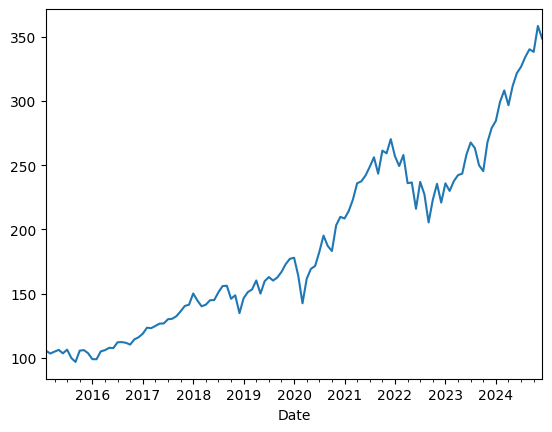

In [124]:
plot_stock(spy_data)